In [1]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Importação dos Dados

In [2]:
df_valid = pd.read_csv('./data/valid.csv')
df_test = pd.read_csv('./data/preprocessed_test.csv.gz', compression='gzip', sep='\t')

In [3]:
def create_split(df, target, drop_start):
    df.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    return df[df.columns[drop_start:]].to_numpy(), df[[target]].to_numpy().reshape(-1)

In [4]:
X_test, y_test = create_split(df_test, 'ALVO', drop_start=1)

In [5]:
def train_in_batches(model, chunksize, target_col, drop_start, increase_estimators = None):
    with pd.read_csv('./data/treino_309.csv', chunksize=chunksize) as reader:
        for chunk in reader:
            Xs, ys = create_split(chunk, target_col, drop_start)
            if (increase_estimators != None):
                model.n_estimators += increase_estimators
            model.fit(Xs, ys)

# Primeiro Modelo: Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
forest = RandomForestClassifier(max_features=25, n_estimators=100, warm_start=True,random_state=0)

In [8]:
train_in_batches(forest, 30000, 'ALVO', 2, increase_estimators=10)

In [9]:
#conjunto de testes nao eh tao grande entao podemos predizer tudo de uma vez
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [10]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

In [11]:
metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

<AxesSubplot:>

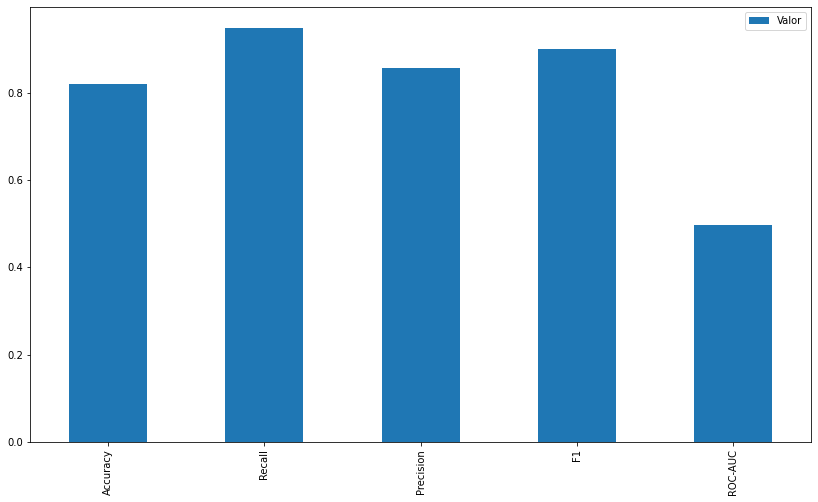

In [12]:
metrics_df.plot(kind='bar',figsize=(14,8))

# Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
gbrt = GradientBoostingClassifier(max_depth = 25, random_state=0, warm_start = True)

In [15]:
train_in_batches(gbrt, 30000, 'ALVO', 2, increase_estimators=10)

In [16]:
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

<AxesSubplot:>

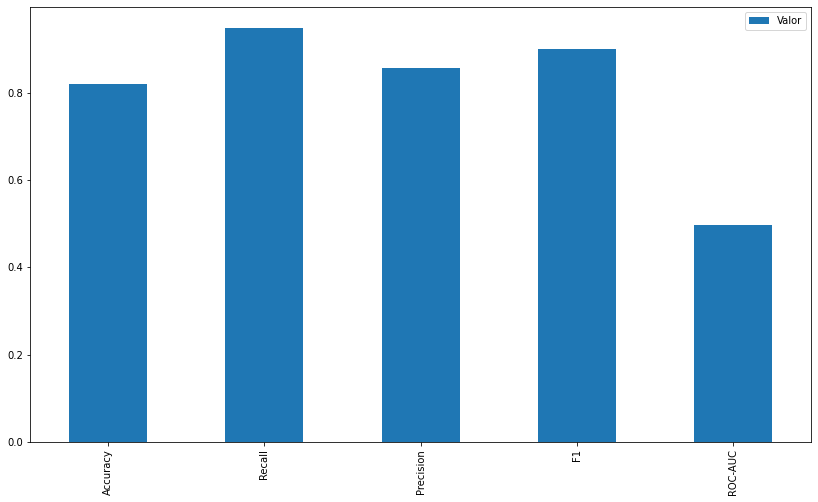

In [17]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))